# Line plot sectoral demand and feedstock supply

In [132]:
# Data modification
import pandas as pd
import numpy as np
import pyam

# Geospatial
import geopandas as gpd

# System
from pathlib import Path
import os

# Plotting
import matplotlib.pyplot as plt

# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Output directory

In [40]:
out_dir = Path.cwd() / ".." / "output_data"

In [41]:
out_fig_dir = Path.cwd() / ".." / "output_figures"

In [42]:
input_dir = Path.cwd() / ".." / "input_data"

# Get a list of EU countries
sheets_dict = pd.read_excel(f"{input_dir}/FN_WP5_Feedstocks_High_Bioenergy_v2_shared.xlsx", sheet_name=None)

excluded_sheets = {"Cover", "info"}
eu_countries = [k for k in sheets_dict.keys() if k not in excluded_sheets]

In [133]:
# Make output_dir for each country
for iso in eu_countries:
    iso_path = os.path.join(out_fig_dir, iso)
    os.mkdir(iso_path)

# Scenario data

In [44]:
# Scenario data is a processed dataset, it is stored in output_data directory
master_df = pyam.IamDataFrame(pd.read_csv(f"{input_dir}/master_scenarios_aggregated.csv"))

# Calculate total bioenergy demand

In [45]:
sectoral_demand = [
    "Electricity And District Heat Demand",
    "Household Demand",
    "Industry Demand",
    "Tertiary And Other Demand",
    "Transport Demand"
]

In [46]:
for v in sectoral_demand:
    master_df.rename(
        variable={v : f"Bioenergy Demand|{v}"},
        inplace=True
    )

In [47]:
master_df.filter(
    variable="*Demand",
).variable

['Bioenergy Demand|Electricity And District Heat Demand',
 'Bioenergy Demand|Household Demand',
 'Bioenergy Demand|Industry Demand',
 'Bioenergy Demand|Tertiary And Other Demand',
 'Bioenergy Demand|Transport Demand']

In [68]:
calc_total_demand = master_df.filter(
    variable="*Demand",
)

total_demand = calc_total_demand.aggregate("Bioenergy Demand")

In [72]:
# Expected = (168, 8)
total_demand.timeseries().shape

(168, 8)

In [83]:
# Combine to master_df
master_df = pyam.concat([master_df, total_demand])

In [85]:
# Expected = (41328, 8)
master_df.timeseries().shape

(41328, 8)

In [96]:
# Total feedstock supply == total bioenergy demand, so we don't need to calculate it again

# Line plot

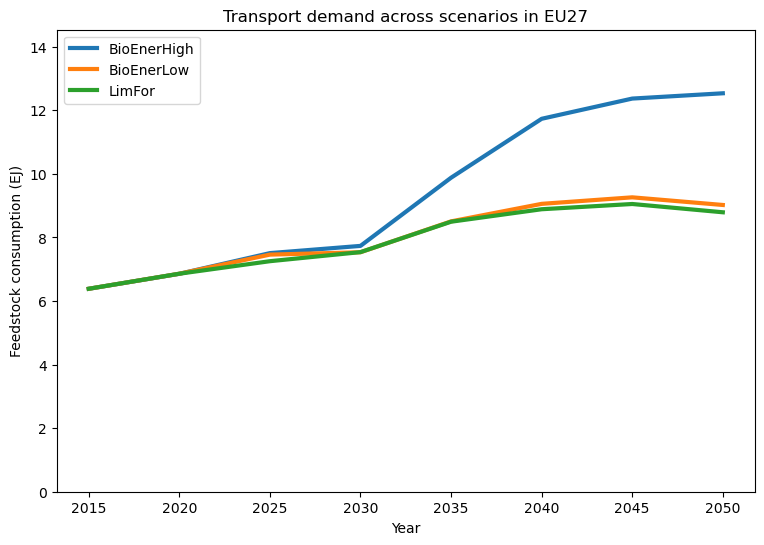

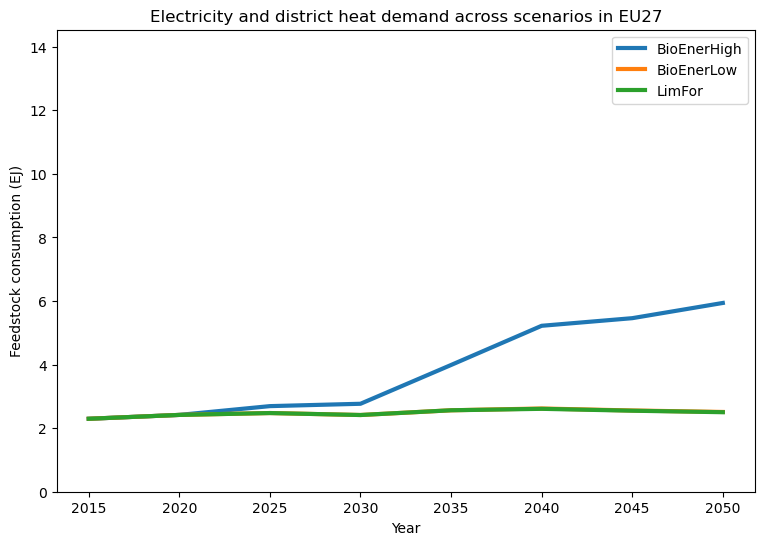

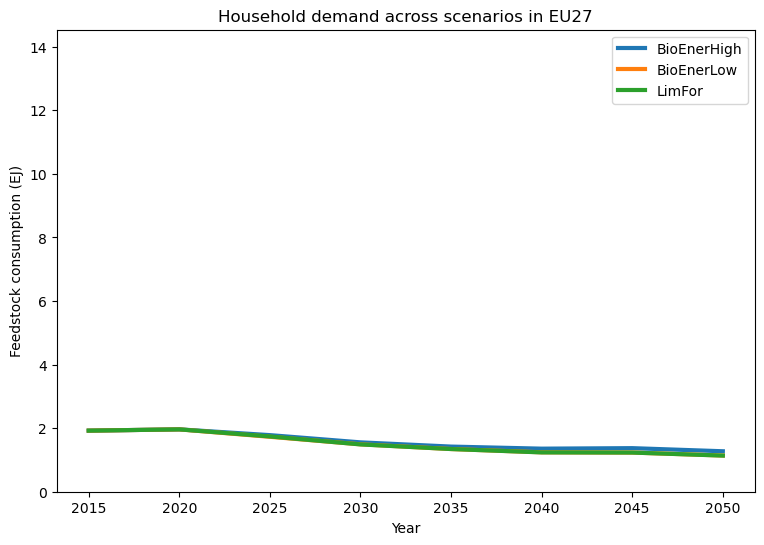

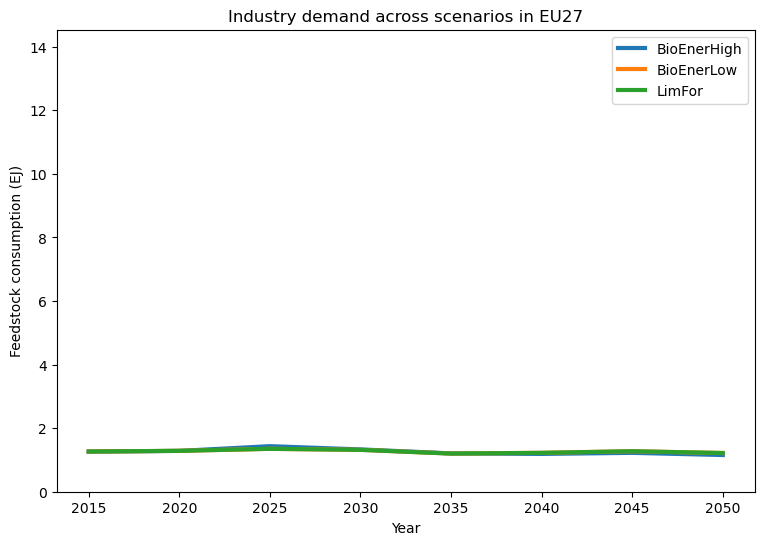

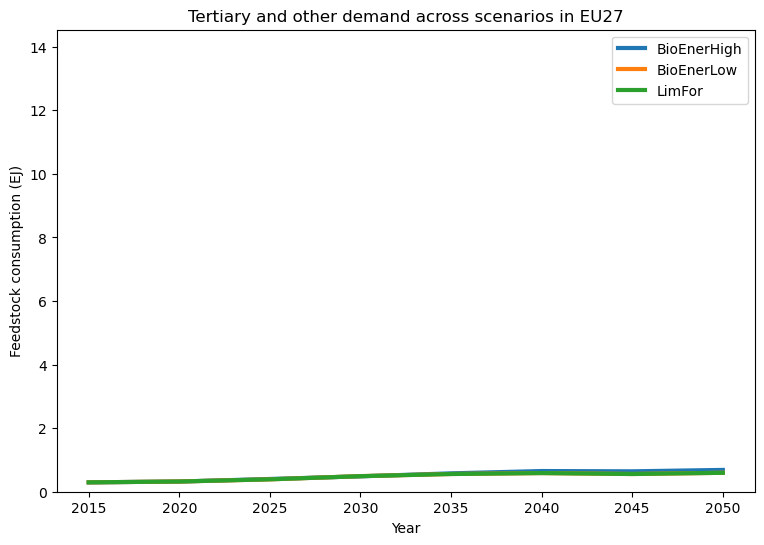

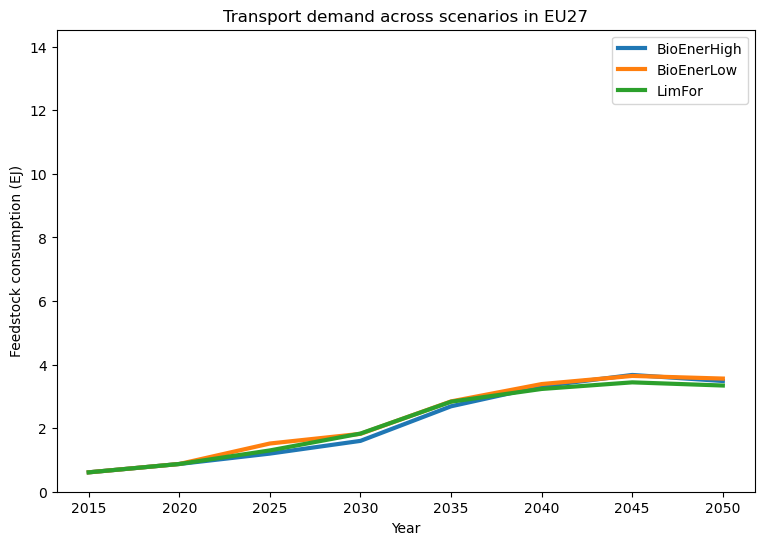

In [129]:
# Scaled to total bioenergy demand at a national level

sel_var = master_df.filter(variable="Bioenergy Demand*").variable

for v in sel_var:
    fig, ax = plt.subplots(figsize=(9, 6))

    data = master_df.filter(variable=v, region="EU27", unit="EJ")
    data.plot(color="scenario", ax=ax, linewidth=3)

    if v != "Bioenergy Demand":
        strip = v.split("|")
        title = strip[1].capitalize()

    ax.set(
        title=f"{title} across scenarios in EU27",
        ylabel="Feedstock consumption (EJ)",
        xlabel="Year"
    )

    max_across_scene = (
        master_df
        .filter(variable="Bioenergy Demand", region="EU27", unit="EJ")
        .timeseries()
        .max(axis=1)
    )
    get_y_max = max_across_scene.max() + 2

    # Set ylim
    ax.set_ylim(0, get_y_max)

    plt.savefig(f"{out_fig_dir}/{title}_EU27_across_scenarios.png", dpi=300)
    

In [143]:
# Not scaled to total bioenergy demand at a national level

sel_var = master_df.filter(variable="Bioenergy Demand*").variable

for v in sel_var:
    fig, ax = plt.subplots(figsize=(9, 6))

    for reg in master_df.region:

        data = master_df.filter(variable=v, region=reg, unit="EJ")
        data.plot(color="scenario", ax=ax, linewidth=3)

        if v != "Bioenergy Demand":
            strip = v.split("|")
            title = strip[1].capitalize()

        else:
            title = v.capitalize()

        ax.set(
            title=f"{title} across scenarios in {reg}",
            ylabel="Feedstock consumption (EJ)",
            xlabel="Year"
        )

        max_across_scene = data.timeseries().max(axis=1)
        get_y_max = max_across_scene.max() + 2

        # Set ylim
        ax.set_ylim(0, get_y_max)

        plt.savefig(f"{out_fig_dir}/{reg}/{title}_across_scenarios.png", dpi=300)
        print("Check the figure in", f"../output_figures/{reg}/{title}...")

        plt.close()
    

Check the figure in ../output_figures/AT/Bioenergy demand...
Check the figure in ../output_figures/BE/Bioenergy demand...
Check the figure in ../output_figures/BG/Bioenergy demand...
Check the figure in ../output_figures/CY/Bioenergy demand...
Check the figure in ../output_figures/CZ/Bioenergy demand...
Check the figure in ../output_figures/DE/Bioenergy demand...
Check the figure in ../output_figures/DK/Bioenergy demand...
Check the figure in ../output_figures/EE/Bioenergy demand...
Check the figure in ../output_figures/EL/Bioenergy demand...
Check the figure in ../output_figures/ES/Bioenergy demand...
Check the figure in ../output_figures/EU27/Bioenergy demand...
Check the figure in ../output_figures/FI/Bioenergy demand...
Check the figure in ../output_figures/FR/Bioenergy demand...
Check the figure in ../output_figures/HR/Bioenergy demand...
Check the figure in ../output_figures/HU/Bioenergy demand...
Check the figure in ../output_figures/IE/Bioenergy demand...
Check the figure in ..